<a href="https://colab.research.google.com/github/hoaian1232812/Lab_ML/blob/main/Lab_7_20130193_HoThanhHoaiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab_ML'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Lab_ML


In [15]:
# code
from sklearn import datasets
from sklearn import svm
from sklearn import metrics as m
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.stats import mode
from numpy import average
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [16]:
def scoreMetrix(clf, x, y, scores=None):
  metrix = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
  for s in metrix:
    print(s.upper() + ':')
    score = cross_validate(clf, x, y, scoring=s, cv=10 )
    for key in score.keys():
      if scores is not None and key == 'test_score':
        scores.append(np.mean(score[key]))
      print(key + ':', np.mean(score[key]))
    print('----------')
  return scores;


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [17]:
data = datasets.load_iris(as_frame=True)
clf = svm.SVC()
scoreMetrix(clf, data['data'], data['target'])

ACCURACY:
fit_time: 0.0024898767471313475
score_time: 0.0014530181884765624
test_score: 0.9733333333333334
----------
PRECISION_MACRO:
fit_time: 0.002300119400024414
score_time: 0.0023754358291625975
test_score: 0.9777777777777779
----------
RECALL_MACRO:
fit_time: 0.0021284818649291992
score_time: 0.002094745635986328
test_score: 0.9733333333333333
----------
F1_MACRO:
fit_time: 0.0020467042922973633
score_time: 0.0023859500885009765
test_score: 0.973063973063973
----------


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [18]:
# using feature
clf = RandomForestClassifier()
clf.fit(data['data'], data['target'])

RandomForestClassifier()

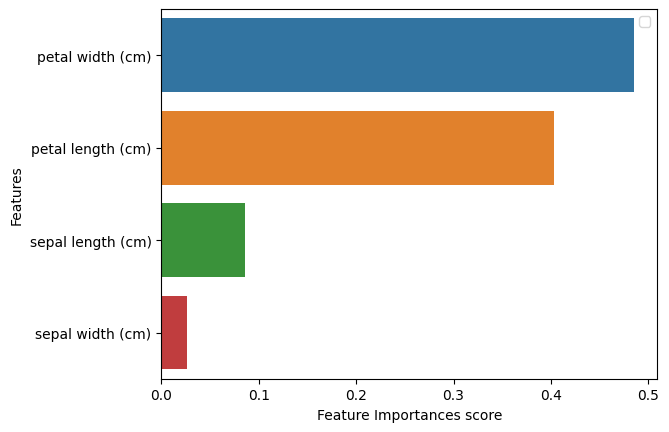

In [19]:
feature = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
sns.barplot(x=feature, y=feature.index)
plt.xlabel('Feature Importances score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [20]:
feature_select = feature[feature > 0.4]
scoreMetrix(clf,data['data'][feature_select.index.values], data['target'])

ACCURACY:
fit_time: 0.139170503616333
score_time: 0.012067174911499024
test_score: 0.9666666666666666
----------
PRECISION_MACRO:
fit_time: 0.17863149642944337
score_time: 0.014400339126586914
test_score: 0.9644444444444445
----------
RECALL_MACRO:
fit_time: 0.15728747844696045
score_time: 0.01293320655822754
test_score: 0.96
----------
F1_MACRO:
fit_time: 0.13244907855987548
score_time: 0.011343741416931152
test_score: 0.9595959595959596
----------


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [21]:
# code
data = datasets.load_digits()
kmean = KMeans(n_clusters=10, random_state=0)
kmean.fit(data['data'])
clusters = kmean.predict(data['data'])
kmean.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

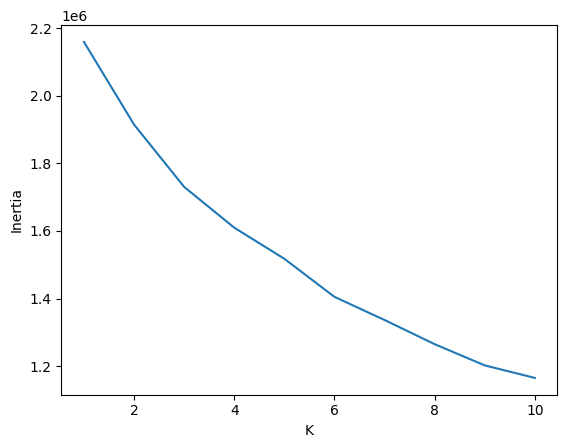

In [22]:
sse = []
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans.fit(data['data'])
  sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [23]:
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 print(mask)
 labels[mask] = mode(data.target[mask])[0]
 print(labels[mask])
acc = m.accuracy_score(data.target, labels)
ps = m.precision_score(data.target, labels, average='macro')
rs = m.recall_score(data.target, labels, average='macro')
fs = m.f1_score(data.target, labels, average='macro')
KMEAN = ('Kmean', round(acc, 2), round(ps, 2),round(rs, 2),round(fs, 2))
print('Accuracy:', acc)
print('Precision:', ps)
print('Recall:', rs)
print('F1:', fs)

[False False False ... False False False]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[False False False ... False False False]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[False False False ... False False False]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5

<ipython-input-23-f5a974dbb532>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(data.target[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [24]:
#Random forest
clf = RandomForestClassifier()
rdfores = scoreMetrix(clf, data['data'], data['target'], scores=['Random Forest'])

ACCURACY:
fit_time: 0.35671243667602537
score_time: 0.01364893913269043
test_score: 0.9493451272501551
----------
PRECISION_MACRO:
fit_time: 0.4004563093185425
score_time: 0.014719653129577636
test_score: 0.9576811283177717
----------
RECALL_MACRO:
fit_time: 0.34323530197143554
score_time: 0.013540410995483398
test_score: 0.9521155830753354
----------
F1_MACRO:
fit_time: 0.34095964431762693
score_time: 0.013538503646850586
test_score: 0.9497316646849923
----------


In [25]:
k_range = range(1,10,2)
acc=[]
ps= []
rs=[]
fs=[]
knn = []
for k in k_range:
  clf = KNeighborsClassifier(n_neighbors=k)
  print('K =', k)
  score = scoreMetrix(clf, data['data'],data['target'], scores=['KNN'])
  knn.append(score)
  acc.append(score[1])
  ps.append(score[2])
  rs.append(score[3])
  fs.append(score[4])

K = 1
ACCURACY:
fit_time: 0.0013594388961791991
score_time: 0.008893513679504394
test_score: 0.9749627560521414
----------
PRECISION_MACRO:
fit_time: 0.0008652448654174804
score_time: 0.009568071365356446
test_score: 0.9774357213220217
----------
RECALL_MACRO:
fit_time: 0.0008809089660644532
score_time: 0.009267282485961915
test_score: 0.9750085999312006
----------
F1_MACRO:
fit_time: 0.000838613510131836
score_time: 0.011353302001953124
test_score: 0.9749172331935332
----------
K = 3
ACCURACY:
fit_time: 0.000859379768371582
score_time: 0.009788608551025391
test_score: 0.9766325263811299
----------
PRECISION_MACRO:
fit_time: 0.0008335113525390625
score_time: 0.010303640365600586
test_score: 0.9788610398545382
----------
RECALL_MACRO:
fit_time: 0.0008731603622436524
score_time: 0.012346816062927247
test_score: 0.9766821465428277
----------
F1_MACRO:
fit_time: 0.0007976770401000976
score_time: 0.009743046760559083
test_score: 0.9768109540040122
----------
K = 5
ACCURACY:
fit_time: 0.0007

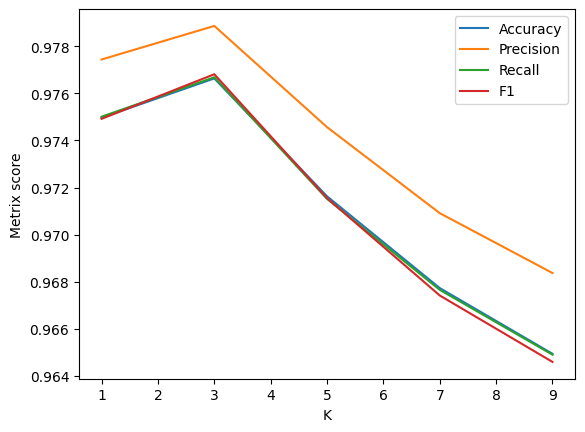

In [26]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, ps, label='Precision')
plt.plot(k_range, rs, label='Recall')
plt.plot(k_range, fs, label='F1')
plt.xlabel('K')
plt.ylabel('Metrix score')
plt.legend()
plt.show()

In [27]:
knn[1]

['KNN',
 0.9766325263811299,
 0.9788610398545382,
 0.9766821465428277,
 0.9768109540040122]

In [28]:
clf = MultinomialNB()
nb = scoreMetrix(clf, data['data'], data['target'], scores=['Naive Bayes'])
print(nb)

ACCURACY:
fit_time: 0.0030333757400512694
score_time: 0.0007138729095458984
test_score: 0.8797858472998138
----------
PRECISION_MACRO:
fit_time: 0.002512621879577637
score_time: 0.0016495704650878907
test_score: 0.8981337347359265
----------
RECALL_MACRO:
fit_time: 0.002638101577758789
score_time: 0.0016792535781860352
test_score: 0.880220158238734
----------
F1_MACRO:
fit_time: 0.002120232582092285
score_time: 0.0016752004623413086
test_score: 0.8792000146081588
----------
['Naive Bayes', 0.8797858472998138, 0.8981337347359265, 0.880220158238734, 0.8792000146081588]


In [29]:
t = PrettyTable(['Classfication', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(KMEAN)
t.add_row(rdfores)
t.add_row(knn[1])
t.add_row(nb)
print(t)

+---------------+--------------------+--------------------+--------------------+--------------------+
| Classfication |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|     Kmean     |        0.79        |        0.8         |        0.79        |        0.79        |
| Random Forest | 0.9493451272501551 | 0.9576811283177717 | 0.9521155830753354 | 0.9497316646849923 |
|      KNN      | 0.9766325263811299 | 0.9788610398545382 | 0.9766821465428277 | 0.9768109540040122 |
|  Naive Bayes  | 0.8797858472998138 | 0.8981337347359265 | 0.880220158238734  | 0.8792000146081588 |
+---------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [30]:
print('Supervised learing better Unsupervised learing')

Supervised learing better Unsupervised learing


:2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [31]:
cluster = AgglomerativeClustering(n_clusters=10)
cluster.fit_predict(data['data'])
print(cluster.labels_)

[7 9 4 ... 4 1 4]


In [32]:
m.cluster.completeness_score(data['target'], cluster.labels_)

0.8790955851724198

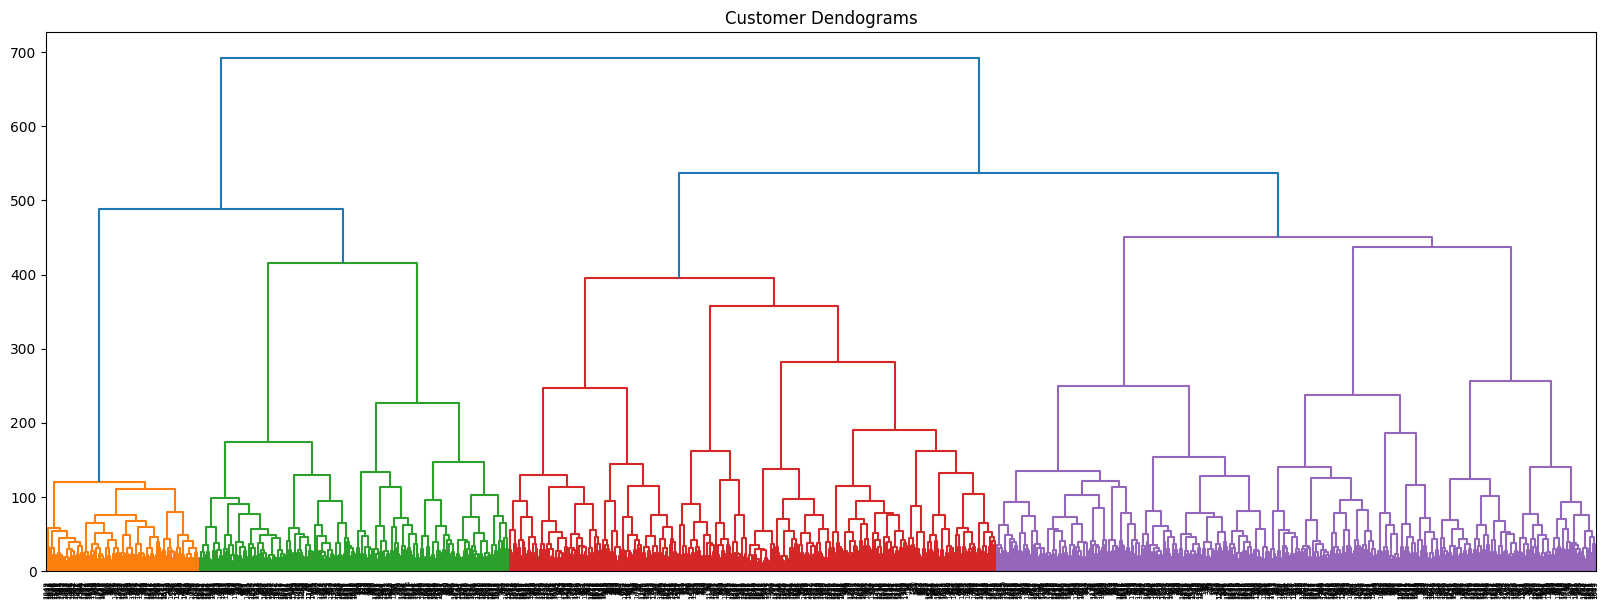

In [33]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data.data, method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [34]:
data = pd.read_csv('shopping-data.csv')
data = data.drop(columns=['CustomerID','Genre'])

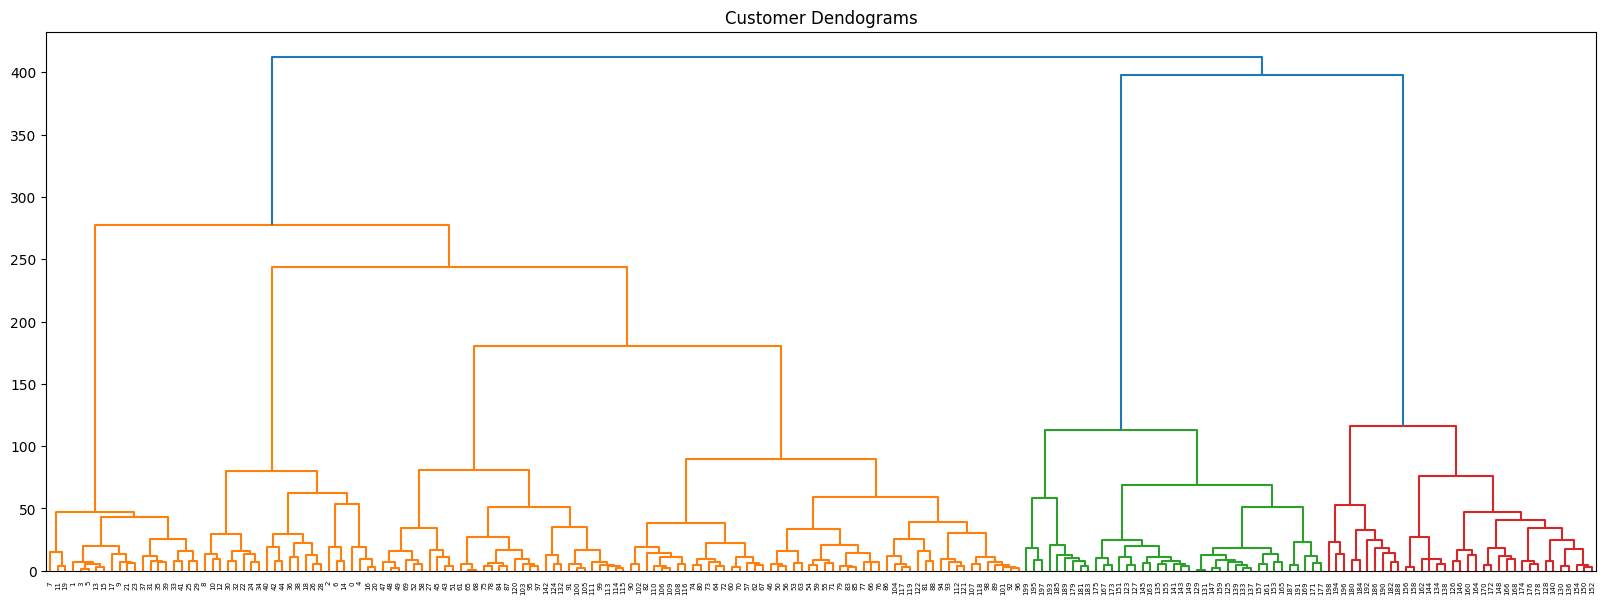

In [35]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

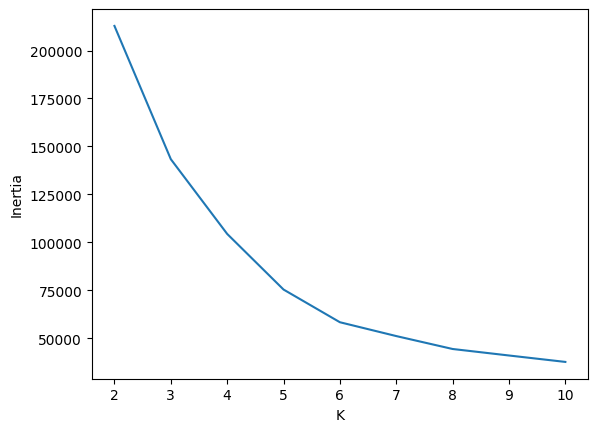

In [36]:
k_range = range(2,11)
sse=[]
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [37]:
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(data)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#Finally,
Save a copy in your Github. Remember renaming the notebook.